In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
import pandas_datareader.data as pdr
from datetime import datetime, date

import yfinance as yf
yf.pdr_override()

y_symbol = ['TSLA']

from datetime import datetime

startdate = datetime(1990,1,1)
today = date.today()
enddate = today

df_tesla = pdr.get_data_yahoo(y_symbol, start = startdate, end = enddate)
df_tesla.head()

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

In [4]:
df_tesla.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-22  166.690002  171.199997  166.300003  170.830002  170.830002   
2024-03-25  168.759995  175.240005  168.729996  172.630005  172.630005   
2024-03-26  178.580002  184.250000  177.380005  177.669998  177.669998   
2024-03-27  181.410004  181.910004  176.000000  179.830002  179.830002   
2024-03-28  177.449997  179.570007  175.300003  175.789993  175.789993   

               Volume  
Date                   
2024-03-22   75454700  
2024-03-25   74228600  
2024-03-26  113186200  
2024-03-27   81804000  
2024-03-28   77654800

# Simple Moving Average

<Axes: xlabel='Date'>

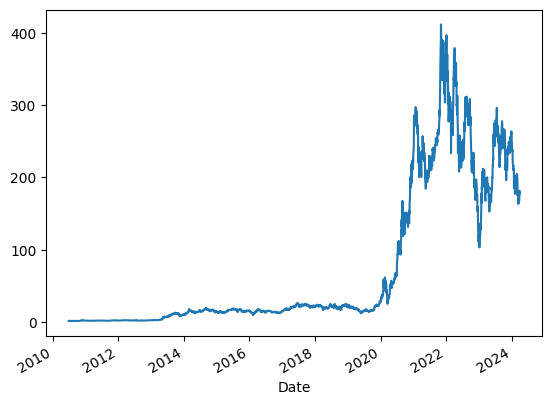

In [5]:
 df_tesla['Open'].plot()

We can see lots of zig zag are there, let's draw simple moving average graph now

In [9]:
df_tesla['Open: 10 days rolling']= df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

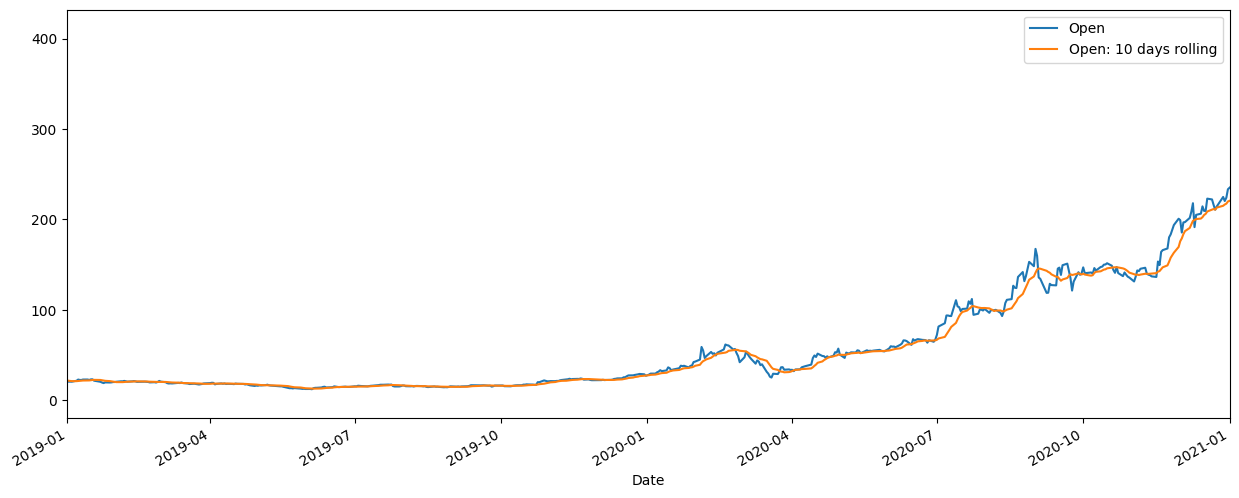

In [13]:
df_tesla[['Open', 'Open: 10 days rolling']].plot(xlim=['2019-01-01', '2021-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

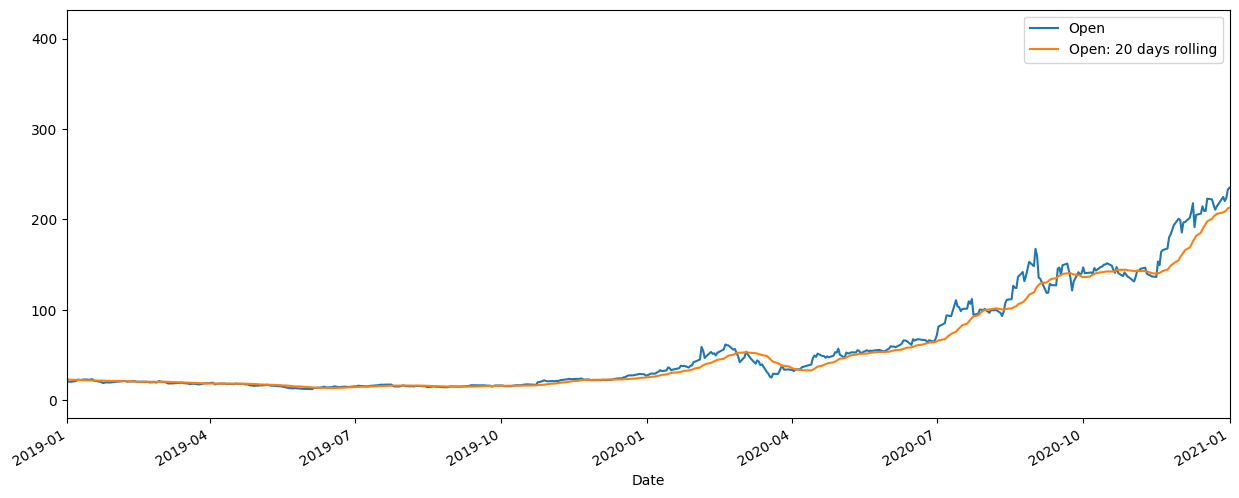

In [15]:
df_tesla['Open: 20 days rolling']= df_tesla['Open'].rolling(window=20, min_periods=1).mean()
df_tesla[['Open', 'Open: 20 days rolling']].plot(xlim=['2019-01-01', '2021-01-01'],figsize=(15,6))

We can see it's giving us a smooth curve now  
User can find out when buy or sell your stocks

<Axes: xlabel='Date'>

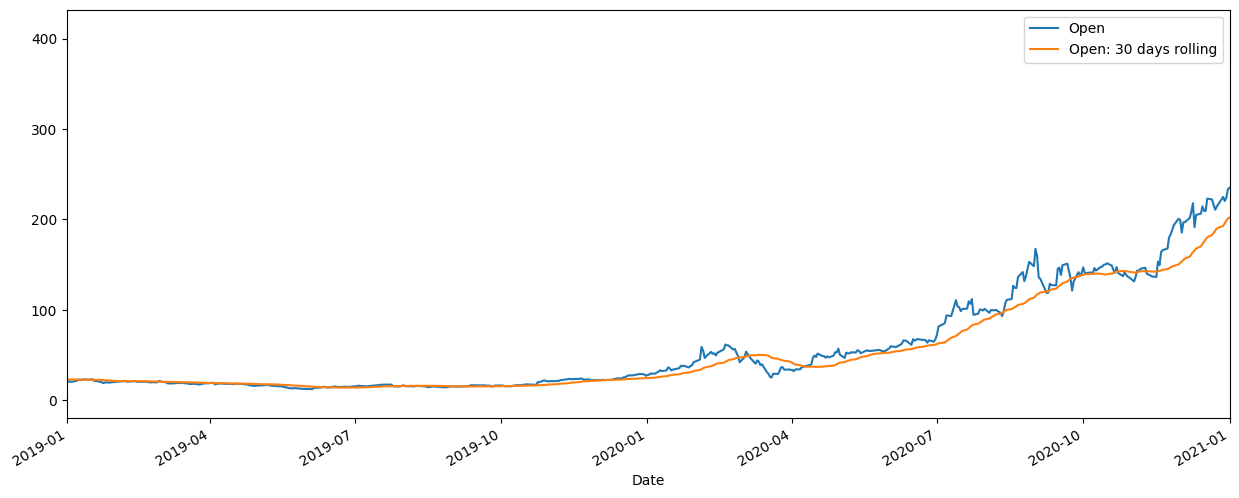

In [14]:
df_tesla['Open: 30 days rolling']= df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla[['Open', 'Open: 30 days rolling']].plot(xlim=['2019-01-01', '2021-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

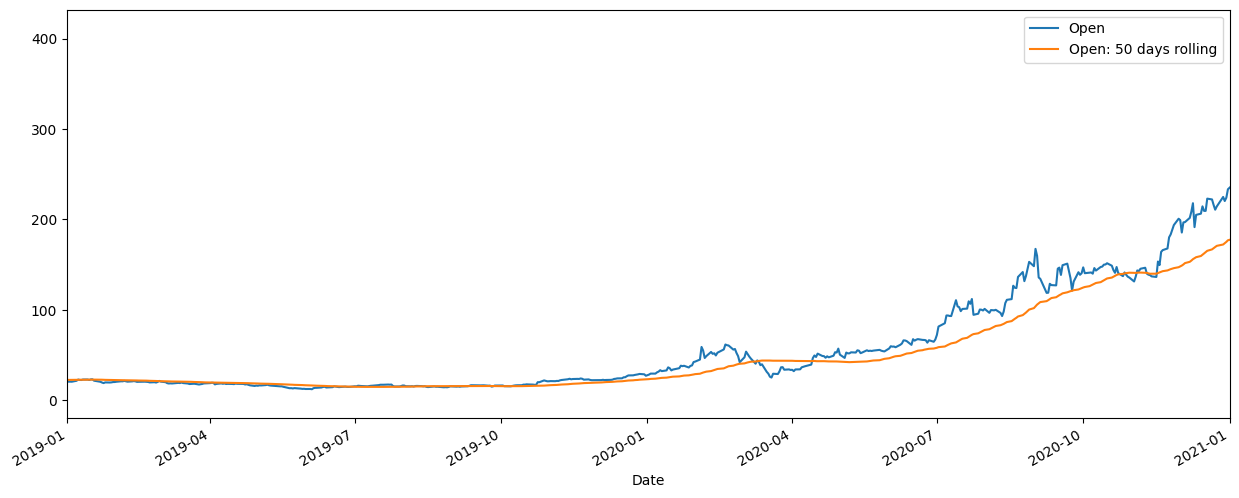

In [16]:
df_tesla['Open: 50 days rolling']= df_tesla['Open'].rolling(window=50, min_periods=1).mean()
df_tesla[['Open', 'Open: 50 days rolling']].plot(xlim=['2019-01-01', '2021-01-01'],figsize=(15,6))

Comparing all ine graph

<Axes: xlabel='Date'>

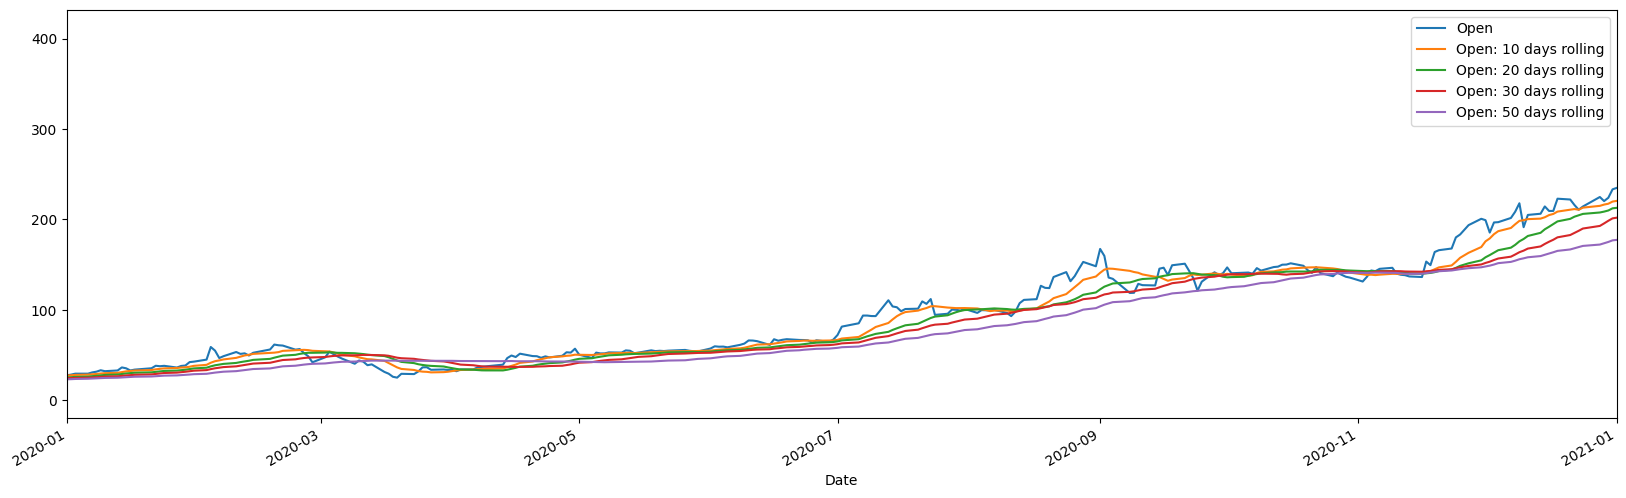

In [19]:
df_tesla[['Open','Open: 10 days rolling', 'Open: 20 days rolling','Open: 30 days rolling', 'Open: 50 days rolling']].plot(xlim=['2020-01-01', '2021-01-01'],figsize=(20,6))

Observation: With more and more window size, the graphs are getting more and more smooth

# Cumulative mean average 
#### WIth the help of expanding

<Axes: xlabel='Date'>

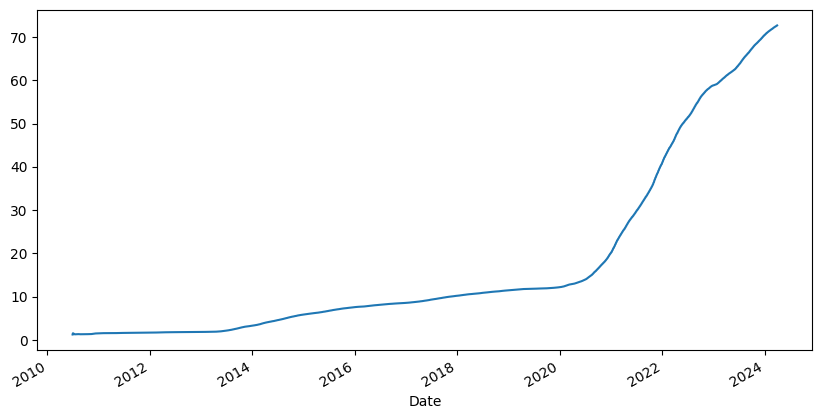

In [21]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

# Exponential Weighted Moving Average
Here our focus is more on the recent data(as that's why we use Time Series analysis)

In [25]:
#let smoothing facotr=0.1

df_tesla['EMA_0.1']= df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

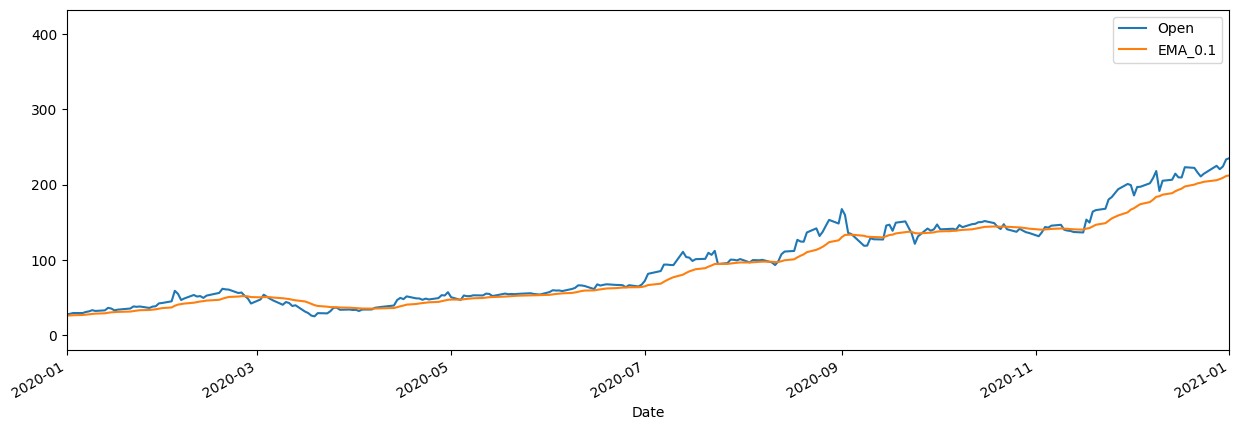

In [26]:
df_tesla[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,5))

It gives more smoothning without lags

In [27]:
#let smoothing facotr=0.3

df_tesla['EMA_0.3']= df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

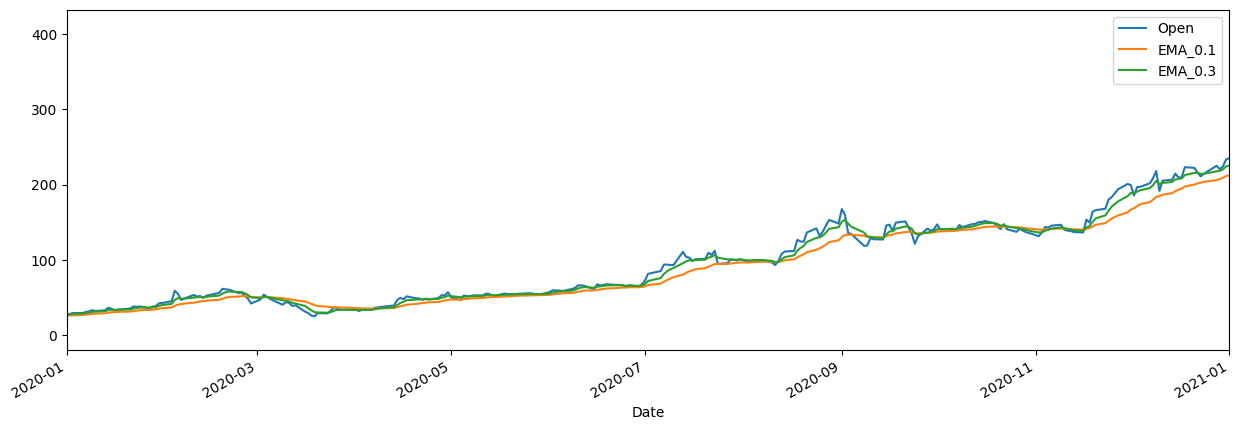

In [28]:
df_tesla[['Open', 'EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,5))

In [29]:
df_tesla['EMA_5days']= df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

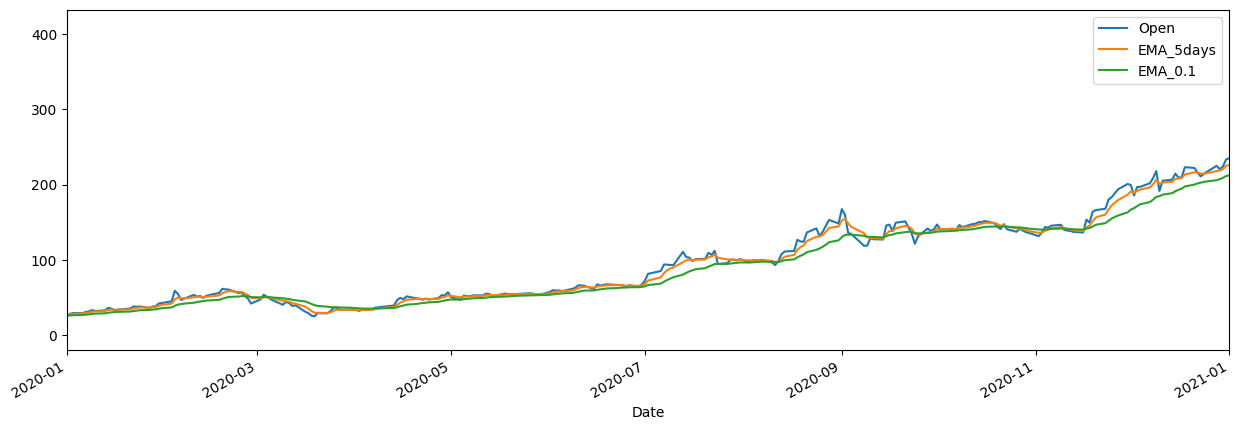

In [32]:
df_tesla[['Open','EMA_5days','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'], 
                                    figsize=(15,5))